#  종합실습1_ Boston_housing

###  1.개요

####  미국 인구 조사국에서 수집한 보스턴 시의 주택 가격에 대한 데이터를 통해 주택의 가격에 영향을 미치는 인자를 분석하고자 한다. 다양한 예측 모델을 이용하여 집값에 영향을 주는 영향인자를 객관적으로 도출하고 선정한 영향인자를 활용하여 집값을 예측해보자.

Columns:
MEDV : 주택가격(중앙값) 

CRIM : 범죄율

ZN : 주거지 비율

INDUS: 비소매업 비율

CHAS: 강 조망 여부(1-조망, 0-비조망)  ## CHAS 를 제외한 나머지 설명 변수는 연속형 데이터이다. 

NOX : (산화 질소 농도)

RM : 주거당 평균 객실 수

AGE : 노후 건물 비율

DIS : 중심지(노동센터) 접근 거리

RAD : 고속도로 접근 편이성 지수

TAX : 재산세율 

PTRATIO : 학생당 교사 비율

B : 흑인 인구 비율

LSTAT : 저소득층 비율


## 라이브러리 import

In [1]:
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import graphviz
#한글 폰트
# plt.rcParams['font.family']='NanumGothic'
plt.rcParams['font.family']='Malgun Gothic'

# 데이터 불러오기 

In [2]:

# df=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/BOSTON_HOUSING.csv")
df=pd.read_csv("C:/Users/nsh65/Documents/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/BOSTON_HOUSING.csv")

df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
x=df.drop('MEDV',axis=1)
y = df['MEDV']

# 데이터 분석

In [6]:
df.isnull().sum()
# 결측값 존재하지 않음.

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### 2.1 상관관계확인  

C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


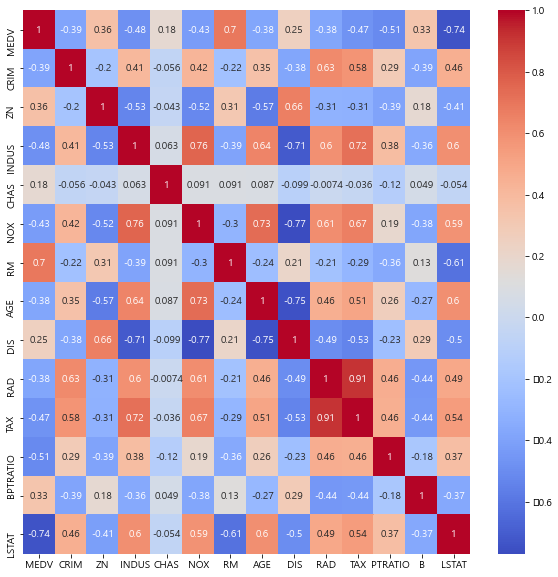

In [7]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap ='coolwarm',annot = True)
# 히트맵의 옵션 어노테이션을 사용하여 히트맵에 수치를 표현하였다. 

### 히트맵은 연속형/범주형 자료 모두 사용할 수 있어서 사용하였다. 
### 데이터들 간의 상관관계는 'coolwarm' 을 사용하여 상관관계가 높고 긍정적이면 빨간색에 가깝고 상관관계가 높고 부정적이면 진한 파란색으로 표시된다. 

### 히트맵을 사용하여 찾아낸 것은 0.45 이상의 데이터가 상관도가 높다고 판단하여 INDUS, RM, TAX, PTRATIO,LSTAT 이 5가지 변수가 집값을 결정하는데 있어서 비중이 높다고 판단함.

### 하지만 이 4가지 변수 사이에서의 상관관계를 보았을 때 TAX(재산세율 )가 설명변수들 간에 상관도가 높다고 파악되어 다중공선성(설명변수들간의 강한 상관관계) 문제가 된다고 판단하여 다중공선성 계수(VIF)를 통해 확인해본다.

### 2.2 VIF(분산팽창계수)확인

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
df_x_const = add_constant(x)
df_vif = pd.DataFrame()
df_vif['variable']= df_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
4,CHAS,1.074
12,B,1.349
1,CRIM,1.792
11,PTRATIO,1.799
6,RM,1.934
2,ZN,2.299
13,LSTAT,2.941
7,AGE,3.101
8,DIS,3.956
3,INDUS,3.992


###  다중공선성 문제를 VI(분산팽창계수)를 통하여 확인한 결과 제일 높은 수치였지만 통상적으로 10보다 클 때 다중공선성이 존재하다고 판단하여 다중공선성 문제는 없다고 판단하고 진행한다.

### 히트맵을 통하여 변수간의 상관 관계를 파악한 후 불필요하다고 판단한 변수들을 제거 한 후새로운 데이터셋을 만들어 진행

###  그래프 분석에서 Scatter Matrix는 상관분석또는 회귀분석 시 변수간의 관계 확인 목적으로 활용하여 밑 6개의 변수간의 분포를 Scatter Matrix를 이용하여 확인해본다.

In [10]:
df1 = df[['MEDV','INDUS', 'RM', 'TAX', 'PTRATIO','LSTAT']]
df2 = df[['MEDV','INDUS', 'RM', 'TAX', 'PTRATIO','LSTAT']]

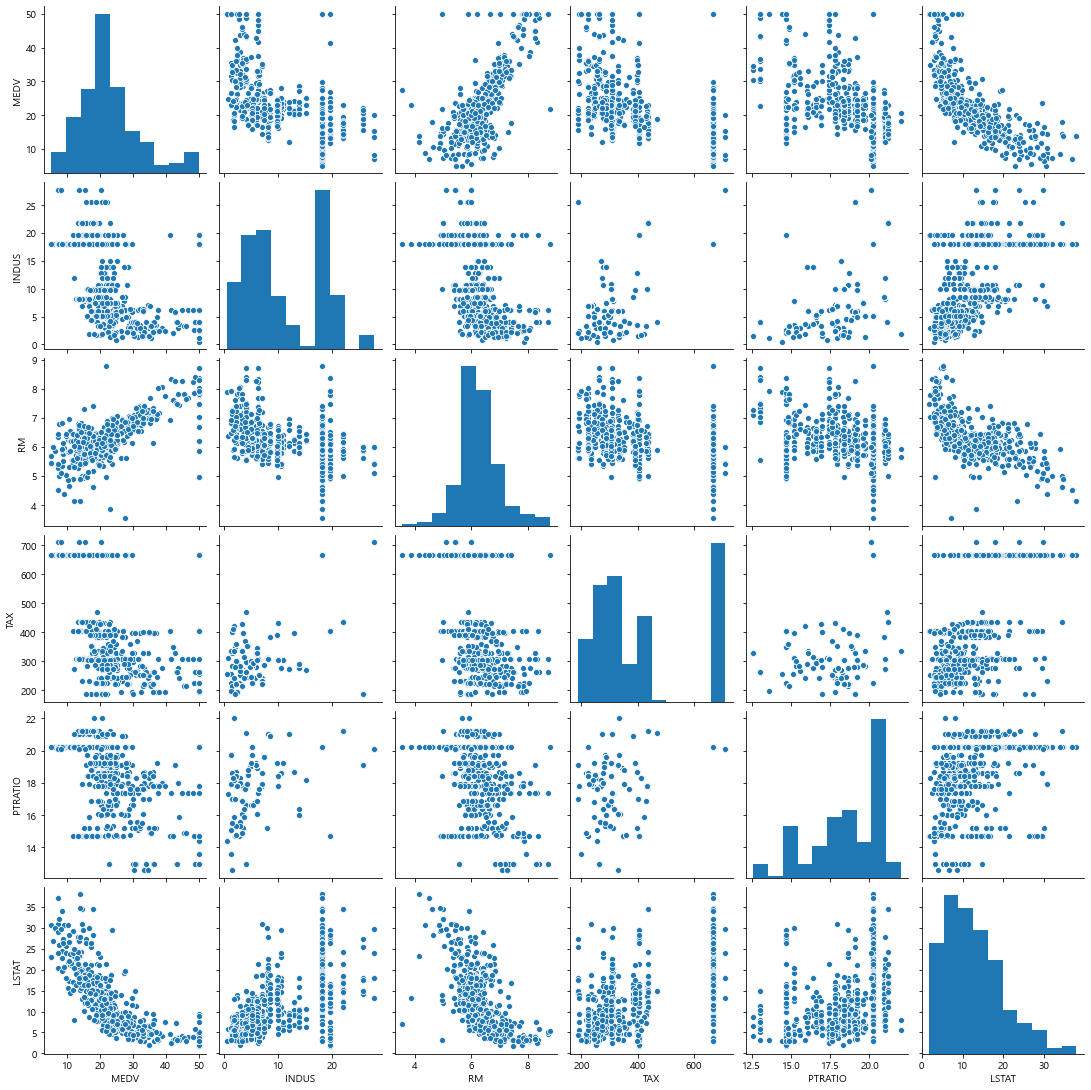

In [11]:
sns.pairplot(data=df1)

### 위 Scatter Matrix 6X6 모형에서 확인할 수 있는것은 (RM,LSTAT)가 MEDV와 선형 관계를 이루는 것을 파악할 수 있었고 RM,LSTAT , MEDV 데이터가 정규분포되어있는 것을 확인 할 수 있었다.

In [12]:
df2.head()

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
0,24.000000,2.31,6.575,296,15.300000,4.98
1,21.600000,7.07,6.421,242,17.799999,9.14
2,34.700001,7.07,7.185,242,17.799999,4.03
3,33.400002,2.18,6.998,222,18.700001,2.94
4,36.200001,2.18,7.147,222,18.700001,5.33


In [13]:
df2.describe().round(3)

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000
mean,22.533,11.137,6.285,408.237,18.456,12.653
std,9.197,6.860,0.703,168.537,2.165,7.141
min,5.000,0.460,3.561,187.000,12.600,1.730
25%,17.025,5.190,5.886,279.000,17.400,6.950
50%,21.200,9.690,6.209,330.000,19.050,11.360
75%,25.000,18.100,6.623,666.000,20.200,16.955
max,50.000,27.740,8.780,711.000,22.000,37.970


###  describe() 함수를 이용하여 데이터들의 최대치와 최소치를 미리 확인 한 결과 MEDV와 LSTAT의 MAX 값이  데이터의 75% 보다 2배이상 높은 것을 확인하였다. 
### 이제 각 변수들의 데이터 이상치 및 분포를 자세히 확인해본다.

### 3.  변수분석

### 3.1 TAX (연속형 독립변수)

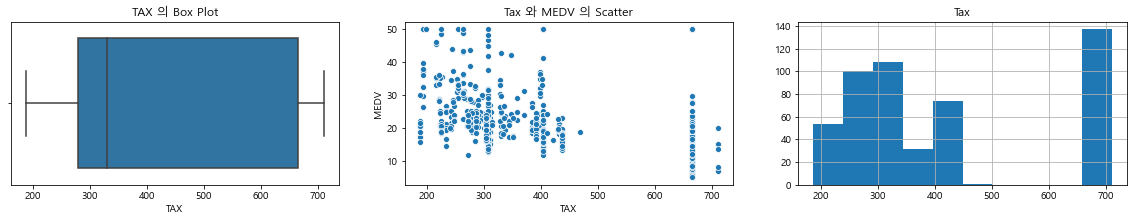

In [14]:
plt.figure(figsize=(20,3))
plt. subplot(1,3,1)
sns.boxplot(df2.TAX)
plt.title('TAX 의 Box Plot')

plt.subplot(1,3,2)
sns.scatterplot(df2.TAX,df.MEDV)
plt.title('Tax 와 MEDV 의 Scatter')

plt.subplot(1,3,3)
df2['TAX'].hist()
plt.title("Tax")

plt.show()

#### 분석 결과 
#### 1. box plot은 데이터의 이상치를 보여주지 못한다. 
#### 2. scatter plot을 통하여 Tax >=600 이상치를 발견하였다.
#### 3. histogram을 통하여 Tax는 정규분포가 아님을 발견하였다.

In [15]:
df_tax = df2[df['TAX']>600].sort_values(by='MEDV')
df_tax

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
398,5.0,18.10,5.453,666,20.200001,30.590000
405,5.0,18.10,5.683,666,20.200001,22.980000
400,5.6,18.10,5.987,666,20.200001,26.770000
399,6.3,18.10,5.852,666,20.200001,29.969999
489,7.0,27.74,5.414,711,20.100000,23.969999
...,...,...,...,...,...,...
368,50.0,18.10,4.970,666,20.200001,3.260000
372,50.0,18.10,5.875,666,20.200001,8.880000
371,50.0,18.10,6.216,666,20.200001,9.530000
369,50.0,18.10,6.683,666,20.200001,3.730000


In [16]:
df_tax.shape
# 약 506개의 데이터중 137개로 파악되었다.

(137, 6)

### 506개의 데이터중 약 30% 에 달하는 데이터를 이상치라 판단하고 삭제하기에는 계륵같다고 생각하여 대체할 값들을 모색한다.

In [17]:
df_tax.describe()

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,16.272263,18.451825,6.006212,667.642336,20.196351,18.674526
std,8.459008,1.814342,0.713021,8.469441,0.018821,6.873578
min,5.000000,18.100000,3.561000,666.000000,20.100000,2.960000
25%,11.000000,18.100000,5.683000,666.000000,20.200001,14.190000
50%,14.300000,18.100000,6.152000,666.000000,20.200001,18.049999
75%,19.900000,18.100000,6.411000,666.000000,20.200001,23.240000
max,50.000000,27.740000,8.780000,711.000000,20.200001,37.970001


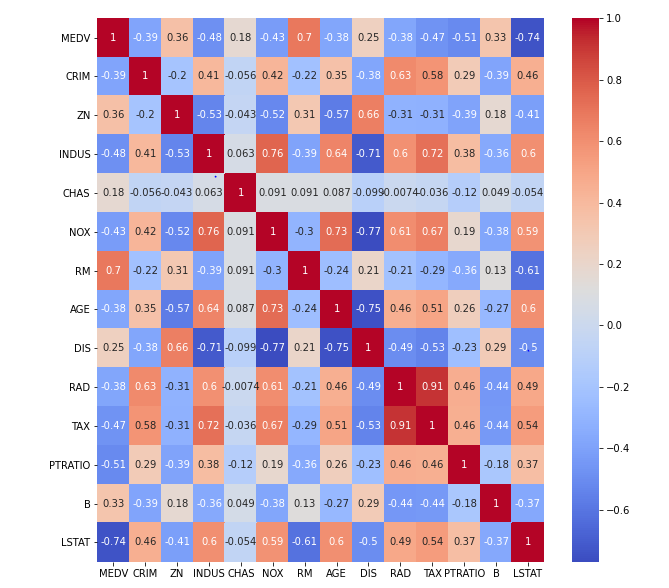

### 위에서 찾은 데이터 히트맵을 다시한번 보자.. MEDV와 상관계수가 높다고 판단한 (INDUS,RM, PTRATIO,LSTAT 중 TAX와 상관도가 높은 것을 찾아 TAX이상치를 대체한다.

###  INDUS의 범위는(18 ~ 27), RM은 (3 ~ 8),PTRATIO(20 ~ 20) ,LSTAT(2 ~ 37) 인데 TAX와 상관도가 제일 높은것은 INDUS( 비소매업 비율) 이지만 범위가 작고 그다음으로 높은 LSTAT(저소득층 비율)이 범위가 (2 ~ 37) 비교적 넓어서 2 ~ 10,10 ~ 20,20 ~ 30, 30 ~ 으로 범위를 나누어 각 범위의 평균치로 Tax의 이상치를 대체한다.

In [18]:
df1.columns

Index(['MEDV', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [19]:
tax1 = df1[(df1['TAX']<600)& (df1['LSTAT']>=0)&(df1['LSTAT']<10)]['TAX'].mean()
# Tax 값이 600이하이고 LSTAT 이 0보다 크거나 같고 10보다 작은 TAX의 평균값
tax2 = df1[(df1['TAX']<600)& (df1['LSTAT']>=10)&(df1['LSTAT']<20)]['TAX'].mean()
# Tax 값이 600이하이고 LSTAT 이 10보다 크거나 같고 20보다 작은 TAX의 평균값
tax3 = df1[(df1['TAX']<600)& (df1['LSTAT']>=20)&(df1['LSTAT']<30)]['TAX'].mean()
# Tax 값이 600이하이고 LSTAT 이 20보다 크거나 같고 30보다 작은 TAX의 평균값
tax4 = df1[(df1['TAX']<600)& (df1['LSTAT']>=30)&(df1['LSTAT']<40)]['TAX'].mean()
# Tax 값이 600이하이고 LSTAT 이 30보다 크거나 같고 40보다 작은 TAX의 평균값

In [20]:
for i in range(len(df1)):
    if df2['TAX'][i] >600 :
        if (0 <= df1['LSTAT'][i] < 10):
            df2.loc[i,'TAX'] = tax1
        elif (10 <= df1['LSTAT'][i] < 20):
            df2.loc[i,'TAX'] = tax2
        elif (20 <= df1['LSTAT'][i] < 30):
            df2.loc[i,'TAX'] = tax3
        elif (df1['LSTAT'][i] >30):
            df2.loc[i,'TAX'] = tax4
# lstat의 기준에 따라 tax의 평균값을 맞춰서 이상치를 변경해주었다.

C:\Users\nsh65\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\nsh65\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-20-5f6ef1dcb8bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2

In [21]:
df2[df2['TAX']>600]['TAX'].count()
### TAX의 값들이 잘 변경되었는지 기존 이상치인 600이상의 데이터의 갯수를 세어 확인하였다.

0

Text(0.5, 1.0, 'Tax')

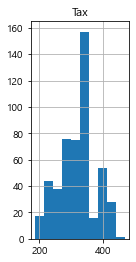

In [22]:
plt.subplot(1,3,3)
df2['TAX'].hist()
plt.title("Tax")
### 히스토 그램를 이용하여 변경된 데이터의 구간별 분포현황을 확인.

In [23]:
df2

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
0,24.000000,2.31,6.575,296.0,15.300000,4.98
1,21.600000,7.07,6.421,242.0,17.799999,9.14
2,34.700001,7.07,7.185,242.0,17.799999,4.03
3,33.400002,2.18,6.998,222.0,18.700001,2.94
4,36.200001,2.18,7.147,222.0,18.700001,5.33
...,...,...,...,...,...,...
501,22.400000,11.93,6.593,273.0,21.000000,9.67
502,20.600000,11.93,6.120,273.0,21.000000,9.08
503,23.900000,11.93,6.976,273.0,21.000000,5.64
504,22.000000,11.93,6.794,273.0,21.000000,6.48


### 3.2 MEDV(주택가격(중앙값)) 목표변수

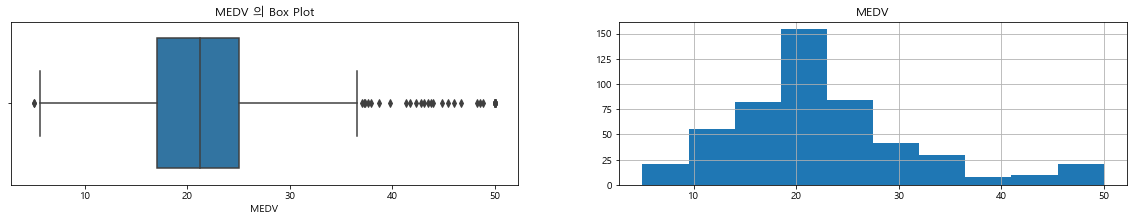

In [24]:
plt.figure(figsize=(20,3))
plt. subplot(1,2,1)
sns.boxplot(df1.MEDV)
plt.title('MEDV 의 Box Plot')

plt.subplot(1,2,2)
df1['MEDV'].hist()
plt.title("MEDV")

plt.show()

#### 분석 결과 
#### 1. box plot을 통하여 비정상적으로 높고 낮은 데이터 이상치를 발견할 수 있었다.
#### 2. Histogram을 이용하여 MEDV 데이터가 정규분포하고 있다는 것을 알 수 있다.

In [25]:
df1['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200001
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

#### 주택가격이 비정상적으로 싼 가격대를 이루고 있는 데이터들을 확인해본다.

In [26]:
df1[df1['MEDV']<6]

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
398,5.0,18.1,5.453,666,20.200001,30.59
400,5.6,18.1,5.987,666,20.200001,26.77
405,5.0,18.1,5.683,666,20.200001,22.98


#### MEDV의 비정상적으로 낮은 수치 데이터로 알수 있는 정보
#### 재산세율이 높고, 저소득층 비율이 MEDV(주택가격)과 반비례하다는 것을 알 수 있다.

#### 주택가격이 비정상적으로 비싼 가격대를 이루고 있는 데이터들을  MEDV,RM 오름차순으로 확인해본다.

In [27]:
df1[df1['MEDV']>35].sort_values(by=['MEDV','RM'])

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
279,35.099998,3.33,6.812,216,14.900000,4.85
273,35.200001,6.96,7.691,223,18.600000,6.58
281,35.400002,3.33,6.968,216,14.900000,4.59
55,35.400002,1.22,7.249,226,17.900000,4.81
258,36.000000,3.97,7.333,264,13.000000,7.79
304,36.099998,2.18,7.236,222,18.400000,6.93
181,36.200001,2.46,6.144,193,17.799999,9.45
4,36.200001,2.18,7.147,222,18.700001,5.33
192,36.400002,3.44,7.178,398,15.200000,2.87
264,36.500000,3.97,7.206,264,13.000000,8.10


#### RM은 MEDV 와 상관관계(+0.7)가 높기때문에 집값이 오르는 이유가 된다고 판단하였다.
#### LSTAT 과 PTRATIO는 상관관계(-0.74 , -0.51)이기 때문에 집값이 내려가는 이유가 된다고 판단하였다.
#### 또한 MEDV 가 정확히 50인 데이터들이 존재하는데 이 데이터들에 공통점을 파악하기에는 너무 많은 변수가 있어서 제거한다.

In [28]:
df2= df2[df['MEDV']<50]

In [29]:
df2.describe()

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,21.635918,11.113143,6.245471,318.152064,18.520000,12.924020
std,7.865301,6.821302,0.653147,58.478134,2.110479,7.083180
min,5.000000,0.740000,3.561000,187.000000,12.600000,1.980000
25%,16.700001,5.190000,5.881000,280.250000,17.400000,7.347500
50%,20.900000,9.690000,6.185000,330.000000,19.100000,11.675000
75%,24.675001,18.100000,6.578000,338.636364,20.200001,17.117501
max,48.799999,27.740000,8.780000,469.000000,22.000000,37.970001


### 데이터의 갯수 변화 :  506 -> MEDV ==50(이상치) 제거후 490개로 총 16개의 데이터가 삭제되었다.

### 3.3 PTRATIO

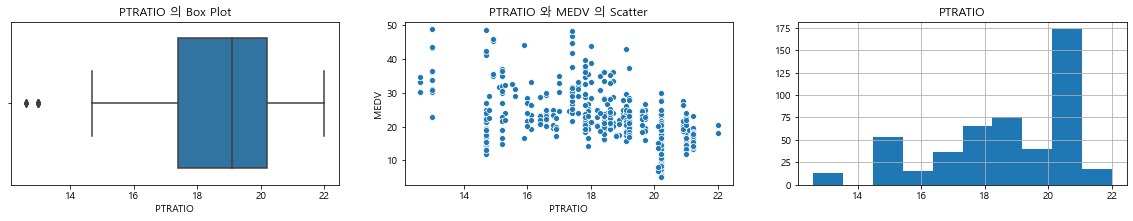

In [30]:
plt.figure(figsize=(20,3))
plt. subplot(1,3,1)
sns.boxplot(df2.PTRATIO)
plt.title('PTRATIO 의 Box Plot')

plt.subplot(1,3,2)
sns.scatterplot(df2.PTRATIO,df.MEDV)
plt.title('PTRATIO 와 MEDV 의 Scatter')

plt.subplot(1,3,3)
df2['PTRATIO'].hist()
plt.title("PTRATIO")

plt.show()

### histogram으로 정규분포가 아닌 것을 알 수 있었다.
### Scatter plot으로 데이터의 선형성은 찾지 못했다.
### 일부 PTRATIO의 낮은 이상치 (14이하)가 감지되었다.

In [31]:
df2[df2['PTRATIO']<14].sort_values(by=['MEDV','LSTAT'],ascending=False)
# ascending =False 는 데이터들을 내림차순으로 볼 수 있다.

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
262,48.799999,3.97,8.398,264.0,13.0,5.91
268,43.500000,3.97,7.470,264.0,13.0,3.16
261,43.099998,3.97,7.520,264.0,13.0,7.26
264,36.500000,3.97,7.206,264.0,13.0,8.10
258,36.000000,3.97,7.333,264.0,13.0,7.79
198,34.599998,1.52,7.274,329.0,12.6,6.62
260,33.799999,3.97,7.203,264.0,13.0,9.59
196,33.299999,1.52,7.287,329.0,12.6,4.08
263,31.000000,3.97,7.327,264.0,13.0,11.25
266,30.700001,3.97,7.014,264.0,13.0,14.79


### MEDV 와 RM관계의 비례관계를 한번더 볼수 있었고 MEDV와 LSTAT의 반비례관계도 위에서 내린 결론과 마찬가지로 동일하였다. LSTAT가 낮은 이상치에서는 특이치가 발견 되지 않아 다음 변수로 넘어간다.

### 3.4 LSTAT

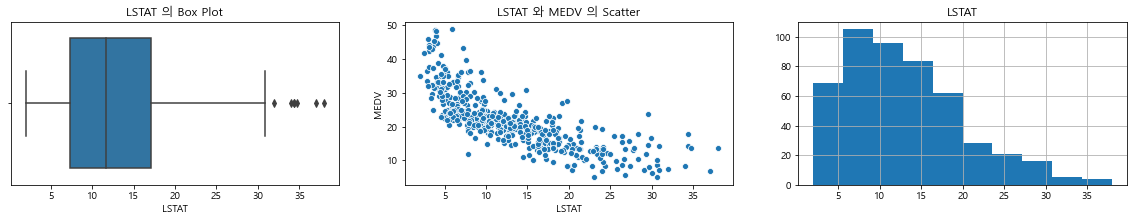

In [32]:
plt.figure(figsize=(20,3))
plt. subplot(1,3,1)
sns.boxplot(df2.LSTAT)
plt.title('LSTAT 의 Box Plot')

plt.subplot(1,3,2)
sns.scatterplot(df2.LSTAT,df.MEDV)
plt.title('LSTAT 와 MEDV 의 Scatter')

plt.subplot(1,3,3)
df2['LSTAT'].hist()
plt.title("LSTAT")

plt.show()

### LSTAT의 이상치(31이상)을 발견할 수 있다.
### Histogram으로 정규분포이고 양수의 왜도 (오른쪽 꼬리를 갖음)임을 알 수 있다.
### Scatter로 데이터의 음의 선형성을 갖음을 파악하였다.

In [33]:
df2[df2['LSTAT']>31].sort_values(by='LSTAT',ascending=False)

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
374,13.8,18.100000,4.138,335.0,20.200001,37.970001
414,7.0,18.100000,4.519,335.0,20.200001,36.980000
373,13.8,18.100000,4.906,335.0,20.200001,34.770000
141,14.4,21.889999,5.019,437.0,21.200001,34.410000
412,17.9,18.100000,4.628,335.0,20.200001,34.369999
438,8.4,18.100000,5.935,335.0,20.200001,34.020000
387,7.4,18.100000,5.000,335.0,20.200001,31.990000


#### 이상치 데이터를 확인해본 결과 특이점을 찾을 수 없었다.
#### LSTAT와 MEDV는 반비례관계이기 때문에 LSAT가 높은데 비해 MEDV는 작다. 당연한 결과다. 

# 3.5 RM(주거당 평균 객실 수)

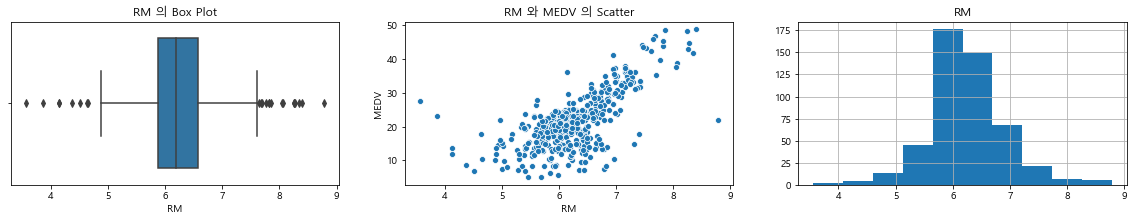

In [34]:
plt.figure(figsize=(20,3))
plt. subplot(1,3,1)
sns.boxplot(df2.RM)
plt.title('RM 의 Box Plot')

plt.subplot(1,3,2)
sns.scatterplot(df2.RM,df.MEDV)
plt.title('RM 와 MEDV 의 Scatter')

plt.subplot(1,3,3)
df2['RM'].hist()
plt.title("RM")

plt.show()

### RM 의 이상치 낮은구간과 높은구간에서 둘다 포착되었다.
### Histogram 으로 정규분포임을 확인하였다.
### Scatter plot 으로 MEDV와 양의 선형 관계라는 것을 포착하였다.

In [35]:
df2[df2['RM']<4.8].sort_values(by=['RM','MEDV'],ascending=False)

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
386,10.5,18.1,4.652,338.636364,20.200001,28.280001
412,17.9,18.1,4.628,335.000000,20.200001,34.369999
414,7.0,18.1,4.519,335.000000,20.200001,36.980000
384,8.8,18.1,4.368,335.000000,20.200001,30.629999
374,13.8,18.1,4.138,335.000000,20.200001,37.970001
406,11.9,18.1,4.138,338.636364,20.200001,23.340000
367,23.1,18.1,3.863,334.330882,20.200001,13.330000
365,27.5,18.1,3.561,294.315789,20.200001,7.120000


### RM 과 MEDV는 높은 상관관계를 갖는데도 불구하고 RM이 낮은데 제일 밑 두행의 데이터의 MEDV가 높다.  따라서 이 데이터를 제거한다.

In [36]:
print(df2.shape)
df3= df2.drop(axis=0, index=[365,367])
print(df3.shape)

(490, 6)
(488, 6)


In [37]:
df3[df3['RM']>7.5].sort_values(by=['RM','MEDV'], ascending=False)

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
364,21.900000,18.10,8.780,294.315789,20.200001,5.29
262,48.799999,3.97,8.398,264.000000,13.000000,5.91
232,41.700001,6.20,8.337,307.000000,17.400000,2.47
224,44.799999,6.20,8.266,307.000000,17.400000,4.14
253,42.799999,5.86,8.259,330.000000,19.100000,3.54
233,48.299999,6.20,8.247,307.000000,17.400000,3.95
97,38.700001,2.89,8.069,276.000000,18.000000,4.21
226,37.599998,6.20,8.040,307.000000,17.400000,3.13
203,48.500000,2.68,7.853,224.000000,14.700000,3.81
280,45.400002,3.33,7.820,216.000000,14.900000,3.76


### RM의 높은 데이터 반면에 MEDV가 심하게 낮은 데이터(364행)을 찾았다. 

In [38]:
print(df3.shape)
df3= df3.drop(axis=0, index=[364])
print(df3.shape)

(488, 6)
(487, 6)


# 3.6 INDUS

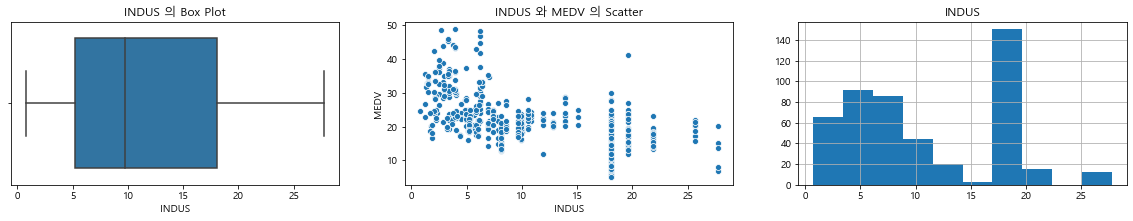

In [39]:
plt.figure(figsize=(20,3))
plt. subplot(1,3,1)
sns.boxplot(df3.INDUS)
plt.title('INDUS 의 Box Plot')

plt.subplot(1,3,2)
sns.scatterplot(df3.INDUS,df.MEDV)
plt.title('INDUS 와 MEDV 의 Scatter')

plt.subplot(1,3,3)
df3['INDUS'].hist()
plt.title("INDUS")

plt.show()

### 데이터 이상치가 없고 비선형 구조이며 정규분포가 아니다!

In [40]:
df3['INDUS'].describe()

count    487.000000
mean      11.070103
std        6.820132
min        0.740000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

###  특이사항을 발견하지 못하여 INDUS는 넘어간다.

### 1. 데이터 분리
### Train : Validation : Test  = 4:3:3

In [41]:
df3

,MEDV,INDUS,RM,TAX,PTRATIO,LSTAT
0,24.000000,2.31,6.575,296.0,15.300000,4.98
1,21.600000,7.07,6.421,242.0,17.799999,9.14
2,34.700001,7.07,7.185,242.0,17.799999,4.03
3,33.400002,2.18,6.998,222.0,18.700001,2.94
4,36.200001,2.18,7.147,222.0,18.700001,5.33
...,...,...,...,...,...,...
501,22.400000,11.93,6.593,273.0,21.000000,9.67
502,20.600000,11.93,6.120,273.0,21.000000,9.08
503,23.900000,11.93,6.976,273.0,21.000000,5.64
504,22.000000,11.93,6.794,273.0,21.000000,6.48


In [42]:
x = df3.iloc[:,1:6]
y = df3.iloc[:,0]

In [43]:
x

,INDUS,RM,TAX,PTRATIO,LSTAT
0,2.31,6.575,296.0,15.300000,4.98
1,7.07,6.421,242.0,17.799999,9.14
2,7.07,7.185,242.0,17.799999,4.03
3,2.18,6.998,222.0,18.700001,2.94
4,2.18,7.147,222.0,18.700001,5.33
...,...,...,...,...,...
501,11.93,6.593,273.0,21.000000,9.67
502,11.93,6.120,273.0,21.000000,9.08
503,11.93,6.976,273.0,21.000000,5.64
504,11.93,6.794,273.0,21.000000,6.48


In [44]:
y

0      24.000000
1      21.600000
2      34.700001
3      33.400002
4      36.200001
         ...    
501    22.400000
502    20.600000
503    23.900000
504    22.000000
505    11.900000
Name: MEDV, Length: 487, dtype: float64

In [45]:
feature_name = x.columns

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns =feature_name)
df_scaled.head()

,INDUS,RM,TAX,PTRATIO,LSTAT
0,-1.285769,0.520220,-0.379296,-1.520680,-1.125130
1,-0.587117,0.273206,-1.301214,-0.336222,-0.537918
2,-0.587117,1.498656,-1.301214,-0.336222,-1.259229
3,-1.304849,1.198710,-1.642665,0.090185,-1.413090
4,-1.304849,1.437704,-1.642665,0.090185,-1.075725


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.3, random_state = 1234)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 3/7 , random_state =1234)

In [47]:
print("Train x_Data Shape :", x_train.shape)
print("Validation x_Data Shape :", x_val.shape)
print("Test _xData Shape :", x_test.shape)
print("Train y_Data Shape :", y_train.shape)
print("Validation y_Data Shape :", y_val.shape)
print("Test y_Data Shape :", y_test.shape)

Train x_Data Shape : (194, 5)
Validation x_Data Shape : (146, 5)
Test _xData Shape : (147, 5)
Train y_Data Shape : (194,)
Validation y_Data Shape : (146,)
Test y_Data Shape : (147,)


# 4.Modeling

## 4.1 다중선형회귀분석

#### 다중선형회귀분석용 데이터 분리

In [48]:
x_train_lin,x_test_lin,y_train_lin,y_test_lin = x_train,x_test,y_train,y_test
x_val_lin,y_val_lin = x_val,y_val

In [49]:
reg_model = smf.ols(formula = "MEDV~INDUS + RM + TAX + PTRATIO+ LSTAT",data=df3 )
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     292.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          3.53e-143
Time:                        01:15:12   Log-Likelihood:                -1356.4
No. Observations:                 487   AIC:                             2725.
Df Residuals:                     481   BIC:                             2750.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2080      3.474      5.817      0.0

### 분석자료수 : 487개 , 잔차 자유도 481, 모델 자유도 5 
### 분산분석 결과 : P값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
### R^2_score 0.752 이고 test R^2_score는 0.750 이다.
### 모든 설명변수의 회귀계수 유의
### 최종모델의 회귀식: 
### MEDV = 20.2080 -0.0974 *INDUS +4.6502 *RM -0.0151*TAX -0.9033*PTRATIO -0.3903 *LSTAT

## 변수의 중요도 확인

C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


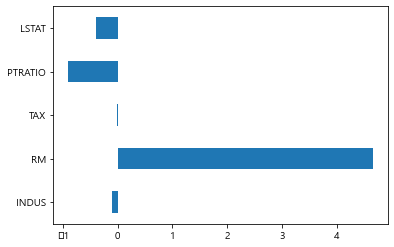

In [50]:
df_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]},index =feature_name)
df_coef.plot.barh(y='Coef',legend = False)

In [51]:
df_coef

,Coef
INDUS,-0.097375
RM,4.650230
TAX,-0.015091
PTRATIO,-0.903336
LSTAT,-0.390260


### 중요도는 회귀 계수의 절대값 크기이다. 따라서 RM(주거당 평균 객실 수)가 높을 수록 MEDV(주택가격)이 높다. PTRATIO(학생당 교사비율)이 낮을수록 MEDV(주택가격)이 높다. RM이 주택가격에 제일 영향도가 높다!

## 4.2 Decision Tree

In [52]:
x_train_dt,x_test_dt,y_train_dt,y_test_dt = x_train,x_test,y_train,y_test
x_val_dt,y_val_dt = x_val,y_val

In [53]:
# GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
#              param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
#                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#                          'max_features': ['auto', 'squrt', 'log2'],
#                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
#                                               12, 13, 14, 15, 16, 17, 18, 19],
#                          'min_samples_split': [4, 6, 8, 10, 12, 14, 16, 18, 20,
#                                                22, 24, 26, 28, 30, 32, 34, 36,
#                                                38]},
#              scoring='r2')

### Decision Tree 의 하이퍼파라미터를 GridSearchCv로 구한 결과를 이용하여 모델생성

In [54]:
dt = DecisionTreeRegressor(criterion='mae', max_depth=8, max_features='log2',
                      min_samples_leaf=2, min_samples_split=6)
dt.fit(x_train_dt,y_train_dt)

DecisionTreeRegressor(criterion='mae', max_depth=8, max_features='log2',
                      min_samples_leaf=2, min_samples_split=6)

### 모델이 테스트 데이터셋의 y의 값을 예측하고 예측값중 상위 5개 값 출력

In [55]:
y_pred_dt = dt.predict(x_test_dt)
y_pred_dt[:5]

array([17.5       , 20.79999924, 19.        , 16.10000038, 17.39999962])

### 잔차들을 산점도로 표현

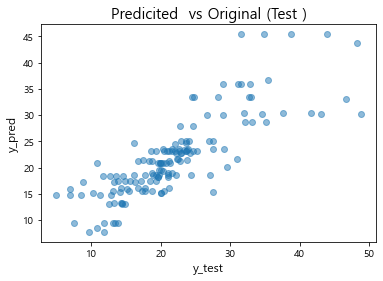

In [56]:
plt.scatter(x=y_test_dt,y=y_pred_dt,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited  vs Original (Test )',size=15)
plt.show()

####  잔차 산점도의 대각선이 완전 직선은 아니다. 실제값과 예측값의 차이가 나는 것이라 해석할 수 있다.

####  잔차 플롯을 이용하여 잔차들의 분산도정도를 확인

C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


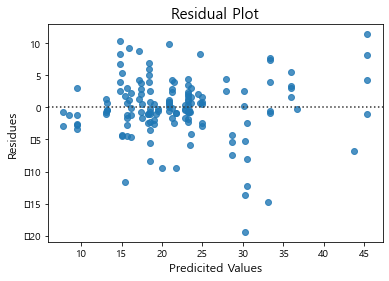

In [57]:
sns.residplot(y_pred_dt,(y_pred_dt-y_test_dt))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

### 잔차가 특별한 패턴을 갖지 않아 등분산성을 성립한다고 판단하였다.

C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


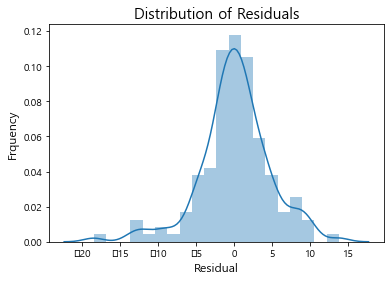

In [58]:
sns.distplot(y_pred_dt-y_test_dt)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

### 잔차가 꽤 정규 분포를 보여주고 있다고 판단할 수 있다.


In [59]:
from sklearn import metrics
r2_dt= metrics.r2_score(y_test_dt,y_pred_dt)
N,p = x_test_dt.shape
adj_r2_dt = 1-((1-r2_dt)*(N-1))/(N-p-1)
print(f'R^2 = {r2_dt}')
print(f'Adjusted R^2 = {adj_r2_dt}')

R^2 = 0.6758764629458016
Adjusted R^2 = 0.6643827204970711


In [60]:
mse_dt = metrics.mean_squared_error(y_test_dt,y_pred_dt)
mae_dt = metrics.mean_absolute_error(y_test_dt,y_pred_dt)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_dt,y_pred_dt))
print(f'Mean Squared Error: {mse_dt}',f'Mean Absolute Error: {mae_dt}',f'Root Mean Squared Error: {rmse_dt}',sep='\n')

Mean Squared Error: 22.476582414845417
Mean Absolute Error: 3.3976190820884353
Root Mean Squared Error: 4.740947417430974


## 결론 : 다중선형회귀모델 보다 R^2의 오차가 0.05정도 작았다. 따라서 다중선형회귀모델이 더 적합하다고 판단할 수 있다. R^2 기준으로 데이터셋과 테스트 셋을 이용하여 비교해본 결과 0.009의 차이로 미세하여 만든 모델이 과대적합과 과소적합 사이에 있다고 보인다.

# 4.3 Random Forest

### 랜덤포레스트 용 데이터 셋 분리

In [61]:
x_train_rf,x_test_rf,y_train_rf,y_test_rf = x_train,x_test,y_train,y_test
x_val_rf,y_val_rf = x_val,y_val

In [62]:
# est=RFR() # alias 사용
# para_depth = [i for i in range(1,11)]
# para_split = [i*2 for i in range(2,21)]
# para_leaf = [i for i in range(1,20)]


# param_grid={'max_depth':para_depth,'min_samples_split':para_split,'min_samples_leaf':para_leaf}

# grid_dt =GridSearchCV(est,param_grid,scoring='r2',n_jobs =-1)
# grid_dt.fit(x_train,y_train)
# print(grid_dt.best_estimator_)
# print(grid_dt.best_params_)
# print(grid_dt.best_score_.round(3))

RandomForestRegressor(max_depth=9, min_samples_split=4)
{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.801

### gridsearchCV를 이용하여 하이퍼파라미터를 구한후 모델 생성

In [63]:
rf = RFR( min_samples_split=4 , max_depth = 9, min_samples_leaf= 1,random_state=1234)
rf.fit(x_train_rf,y_train_rf)


RandomForestRegressor(max_depth=9, min_samples_split=4, random_state=1234)

In [64]:
y_pred_rf = rf.predict(x_test_rf)
y_pred_rf[:5]

array([20.93354955, 20.41036188, 19.49508504, 20.09040019, 17.20194953])

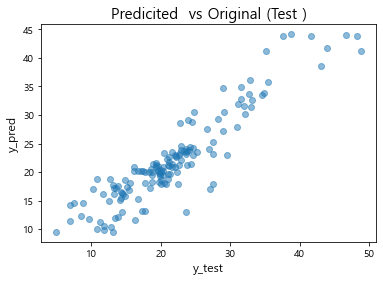

In [65]:
plt.scatter(x=y_test_rf,y=y_pred_rf,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited  vs Original (Test )',size=15)
plt.show()

### 완전 직선은 아니지만 선형구조를 띈다고 판단할 수 있다.

C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


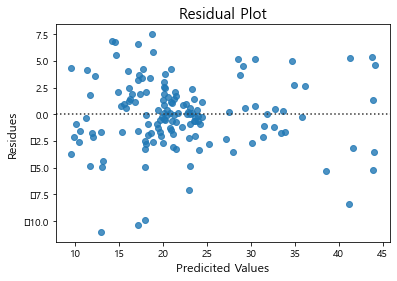

In [66]:
sns.residplot(y_pred_rf,(y_pred_rf-y_test_rf))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

### 결정 트리와 비슷한 모양을 띄고 있다. 왼쪽 중간으로 몰린 느낌이 나지만 판단하기 애매하다..

C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


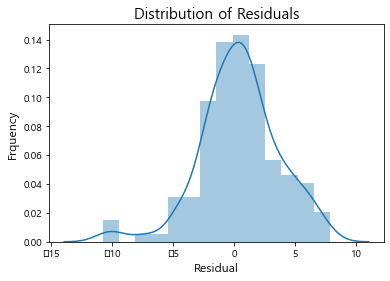

In [67]:
sns.distplot(y_pred_rf-y_test_rf)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

###  잔차가 정규분포를 이루고 있다.

In [68]:
r2_rf= metrics.r2_score(y_test_rf,y_pred_rf)
N,p = x_test.shape
adj_r2_rf = 1-((1-r2_rf)*(N-1))/(N-p-1)
print(f'R^2 = {r2_rf}')
print(f'Adjusted R^2 = {adj_r2_rf}')

R^2 = 0.8452082392336491
Adjusted R^2 = 0.8397191697029274


In [69]:
mse_rf = metrics.mean_squared_error(y_test_rf,y_pred_rf)
mae_rf = metrics.mean_absolute_error(y_test_rf,y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_rf,y_pred_rf))
print(f'Mean Squared Error: {mse_rf}',f'Mean Absolute Error: {mae_rf}',f'Root Mean Squared Error: {rmse_rf}',sep='\n')

Mean Squared Error: 10.734147231714768
Mean Absolute Error: 2.4620295130714056
Root Mean Squared Error: 3.276300845727506


### 지금까지 DT 와 다중선형회귀모델 이 두개보다 가장 좋은 모델이 나온 것 같다.
### R^2 이  train test 셋 0.005차이를 지니고 있어서 과대적합과 과소적합의 최적점에 있다고 판단된다.

# 4.3 GradientBoostingRegressor

#### GradientBoostingRegressor 용 데이터셋 분리

In [70]:
x_train_gb,x_test_gb,y_train_gb,y_test_gb = x_train,x_test,y_train,y_test
x_val_gb,y_val_gb = x_val,y_val

In [71]:
# est=GradientBoostingRegressor()
# para_depth = [i for i in range(1,11)]
# para_lr =[i*0.1 for i in range(1,10)]
# para_leaf = [i for i in range(1,21)]


# # param_grid={"learning_rate"=para_lr,"criterion":['mse','friedman_mse','mae'],"max_features":['auto','squrt','log2'],"min_samples_leaf":para_leaf,"max_depth": para_depth}
# param_test = { "n_estimators": range(50, 100, 25), "max_depth": para_depth, "learning_rate": para_lr, "subsample": [0.7, 0.9], "max_features": list(range(1, len(x_train), 2)),"min_samples_leaf":para_leaf }

# grid_dt =GridSearchCV(est,param_grid=param_test,scoring='r2',n_jobs =-1)
# grid_dt.fit(x_train_gb,y_train_gb)
# print(grid_dt.best_estimator_)
# print(grid_dt.best_params_)
# print(grid_dt.best_score_.round(3))

#### GridSearchCV 를 이용하여 하이퍼파라미터를 설정하여 모델을 생성하였다.

GradientBoostingRegressor(max_depth=8, max_features=3, n_estimators=50,
                          subsample=0.7)
{'learning_rate': 0.1, 'max_depth': 8, 'max_features': 3, 'n_estimators': 50, 'subsample': 0.7}
0.818

In [72]:
gb = GradientBoostingRegressor(max_depth=8, max_features=3, n_estimators=50,subsample=0.7)
gb.fit(x_train_gb,y_train_gb)

GradientBoostingRegressor(max_depth=8, max_features=3, n_estimators=50,
                          subsample=0.7)

#### 예측한 값들을 저장하고 상위5개를 확인

In [73]:
y_pred_gb = gb.predict(x_test_gb)
y_pred_gb[:5]

array([20.34224642, 20.70406203, 19.77359713, 16.67338619, 15.93030436])

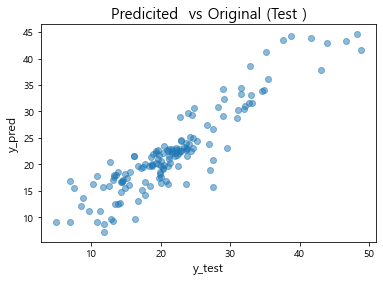

In [74]:
plt.scatter(x=y_test_gb,y=y_pred_gb,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited  vs Original (Test )',size=15)
plt.show()

####  잔차들이 거의 직선의 모습을 띄고 있다.

C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


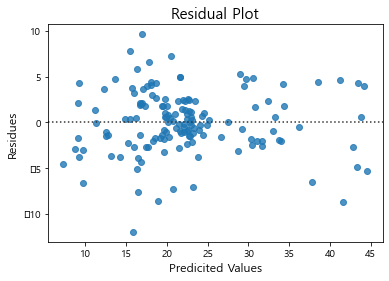

In [75]:
sns.residplot(y_pred_gb,(y_pred_gb-y_test_gb))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

### 잔차들이 가운데아 홀쭉한 모래시계뒤집어 논듯한 모양을 하고 있다. 등분산성을 만족하지 못한다고 볼 수 있다.

C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nsh65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


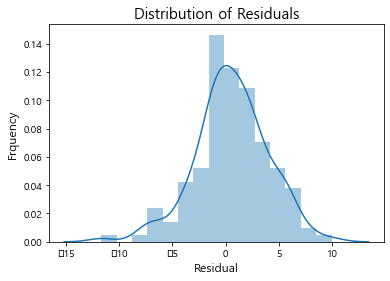

In [76]:
sns.distplot(y_pred_gb-y_test_gb)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

#### 잔차들이 정규분포를 이루고 있다.

In [77]:
r2_gb= metrics.r2_score(y_test_gb,y_pred_gb)
N,p = x_test.shape
adj_r2_gb = 1-((1-r2_rf)*(N-1))/(N-p-1)
print(f'R^2 = {r2_rf}')
print(f'Adjusted R^2 = {adj_r2_rf}')

R^2 = 0.8452082392336491
Adjusted R^2 = 0.8397191697029274


In [78]:
mse_gb = metrics.mean_squared_error(y_test_gb,y_pred_gb)
mae_gb = metrics.mean_absolute_error(y_test_gb,y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test_gb,y_pred_gb))
print(f'Mean Squared Error: {mse_gb}',f'Mean Absolute Error: {mae_gb}',f'Root Mean Squared Error: {rmse_gb}',sep='\n')

Mean Squared Error: 11.95537761061116
Mean Absolute Error: 2.649952172662479
Root Mean Squared Error: 3.457654929372097


### 모델 최종 평가 : 랜덤포레스트 모델보다 R^2 값이 작다 하지만 다중회귀모델과 결정트리 모델보다는 점수가 높게 나왔다. 과소적합과 과대적합을 판단해보자면 R^2 가 0.006으로 최적점에 있는 모델이라 할 수 있겠다.

In [79]:
models = [('Linear Regression', ' ', ' ', ' ','0.752', '0.750'),
          ('Decision Tree Regression', mse_dt,mae_dt, rmse_dt, r2_dt, adj_r2_dt),
          ('Random Forest Regression', mse_rf,mae_rf, rmse_rf, r2_rf, adj_r2_rf),
          ('GradientBoosting Regression',mse_gb,mae_gb, rmse_gb, r2_gb, adj_r2_gb),
         ]

In [80]:
predict = pd.DataFrame(data = models, columns=['Model', 'MSE','MAE','RMSE', 'R2_Score(training)', 'R2_Score(test)'])

In [81]:
predict

,Model,MSE,MAE,RMSE,R2_Score(training),R2_Score(test)
0,Linear Regression,,,,0.752,0.750
1,Decision Tree Regression,22.4766,3.39762,4.74095,0.675876,0.664383
2,Random Forest Regression,10.7341,2.46203,3.2763,0.845208,0.839719
3,GradientBoosting Regression,11.9554,2.64995,3.45765,0.827597,0.839719


### 최종 결론 : 총 4개의 회귀모델을 만들었다. 그중 R^2 점수가 가장 높은 모델은 Random Forest Regression 이다. MSE를 보았을 때도 랜덤 포레스트 모델이 가장 낮았다. MSE(평균제곱오차)의 수치가 작을수록 정확성이 높다. 

### 따라서 지금 주어진 Boston Housing 데이터에는 랜덤 포레스트 모델을 사용하는 것이 최적이라고 말할 수 있다. 만약에 이 데이터들로 지금 현재의 보스턴 집가격을 예측하라고 하면 당연히 불가능 할 것이다. 가격도 너무 달라졌을고 데이터, 새로운 설명변수 .. 등등 하지만 회귀분석을 실습하고 공부하는데는 좋은 데이터 였다.
### 개인 프로젝트로  시스템 트레이딩을 구축하고 있는데 정확한 값을 예측하지는 못하더라도 방향성을 잡기위하여 회귀분석을 통한 매매법에 대한 고려도 해봐야겠다.
